In [2]:
import dask
from dask.graph_manipulation import bind
import graphviz

## Adding task with side effects

In [2]:
DATA = []

@dask.delayed
def inc(x):
    return x + 1


@dask.delayed
def add_data(x):
    DATA.append(x)


@dask.delayed
def sum_data(x):
    return sum(DATA) + x


a = inc(1)
b = add_data(a)
c = inc(3)
d = add_data(c)
e = inc(5)
f = bind(sum_data, [b, d])(e)


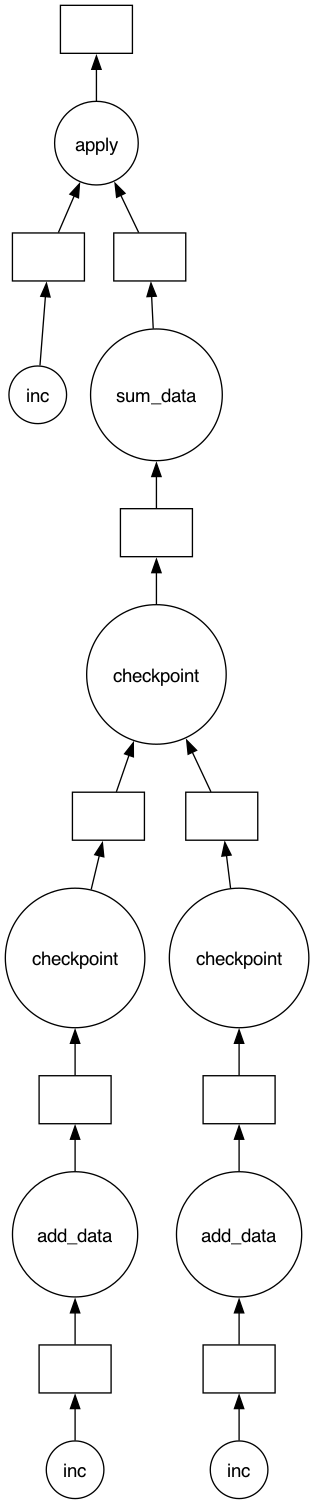

In [7]:
dask.visualize(f)

In [11]:
f.compute()

12

## Remarks

1) Dask provides bind method to add task with side effects

## Dask delay inside delayed object

### Case 1

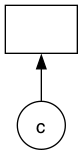

In [14]:
@dask.delayed
def a():
    return 1


@dask.delayed
def b():
    return 2


@dask.delayed
def c():
    return a + b


dask.visualize(c())

### Case 2

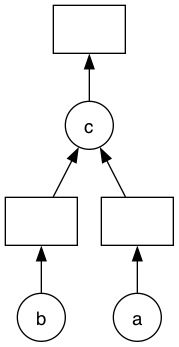

In [24]:
@dask.delayed
def a():
    return 1


@dask.delayed
def b():
    return 2


@dask.delayed
def c(a, b):
    print("In c")
    return a + b


z = c(a(), b())

dask.visualize(z)

### Case 3

Inside c


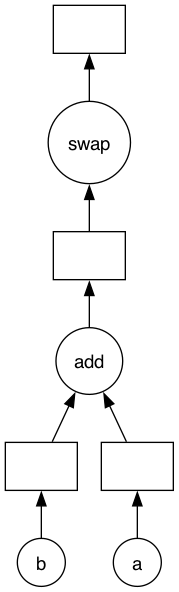

In [22]:
@dask.delayed
def a():
    return 1


@dask.delayed
def b():
    return 2


def c(a, b):
    print("Inside c")
    c = a + b
    return 1 + c


z = c(a(), b())
dask.visualize(z)

## Remarks

1) Dask task graph shows the flow of input going into task and output coming from it.
2) If a task is taking dask delayed as input, it is shown.
3) If a task is internally consuming a dask delayed, it is not shown in the graph.